# Historical evolution of the Greeks

In [1]:
import json
from matplotlib import pyplot as plt

In [2]:
with open("BB210917C00023000.json") as f:
    data = json.load(f)
    
option_name = data[0][0]
option_serie = data[2]
xs = [d[0]/86400 for d in option_serie]
iv = [d[1][3] for d in option_serie]
bid = [d[1][2] for d in option_serie]
sp = [d[1][-4] for d in option_serie]
delta = [d[1][-8] for d in option_serie]
gamma = [d[1][-7] for d in option_serie]
theta = [d[1][-6] for d in option_serie]
vega = [d[1][-5] for d in option_serie]
print("Loading " + option_name)

Loading BB210917C00023000


## Delta

Delta shows the speed at which the option's premium increases for a one dollar change in the underlying stock's price.

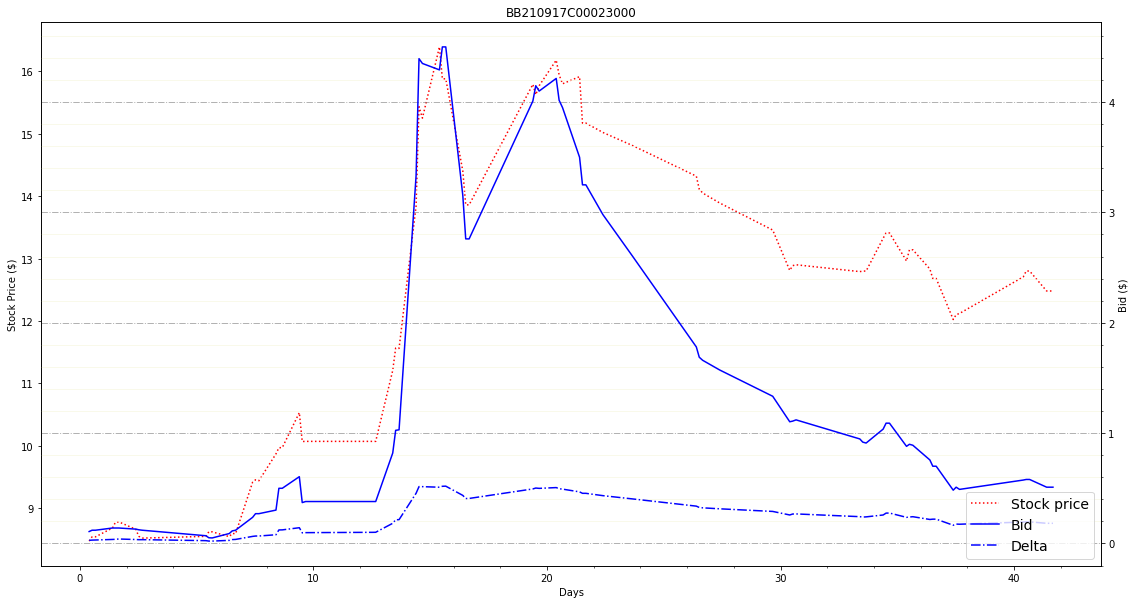

In [6]:
fig,ax = plt.subplots()
ax.set_title(option_name)
ax.set_xlabel("Days")
ax.set_ylabel("Stock Price ($)")
line1, = ax.plot(xs, sp, 'r:', label='Stock price')
ax2 = ax.twinx()
ax2.set_ylabel("Bid ($)")
line3, = ax2.plot(xs, delta, 'b-.', label='Delta')
line2, = ax2.plot(xs, bid, 'b-', label='Bid')
plt.legend(handles=[line1, line2, line3], loc='lower right', fontsize=14)
#major grid lines
plt.grid(b=True, which='major', color='gray', alpha=0.6, linestyle='dashdot', lw=1)
#minor grid lines
plt.minorticks_on()
plt.grid(b=True, which='minor', color='beige', alpha=0.6, ls='-', lw=1)
plt.rcParams['figure.figsize'] = [19, 10]
plt.show()

## Vega

Vega measures the impact of volatility changes on the option's premium.

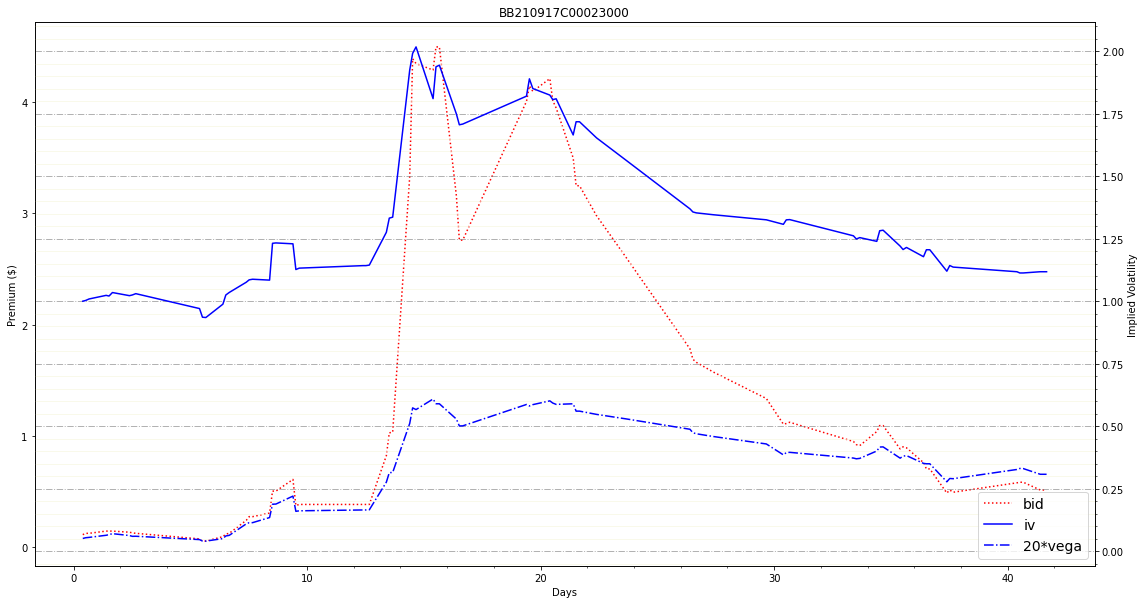

In [4]:
fig,ax = plt.subplots()
ax.set_title(option_name)
ax.set_xlabel("Days")
ax.set_ylabel("Premium ($)")
line1, = ax.plot(xs, bid, 'r:', label='bid')
ax2 = ax.twinx()
ax2.set_ylabel("Implied Volatility")
line3, = ax2.plot(xs, [20*e for e in vega], 'b-.', label='20*vega')
line2, = ax2.plot(xs, iv, 'b-', label='iv')
plt.legend(handles=[line1, line2, line3], loc='lower right', fontsize=14)
#major grid lines
plt.grid(b=True, which='major', color='gray', alpha=0.6, linestyle='dashdot', lw=1)
#minor grid lines
plt.minorticks_on()
plt.grid(b=True, which='minor', color='beige', alpha=0.6, ls='-', lw=1)
plt.rcParams['figure.figsize'] = [19, 10]
plt.show()

## Theta

Theta is the rate at which the premium will decay as time passes.

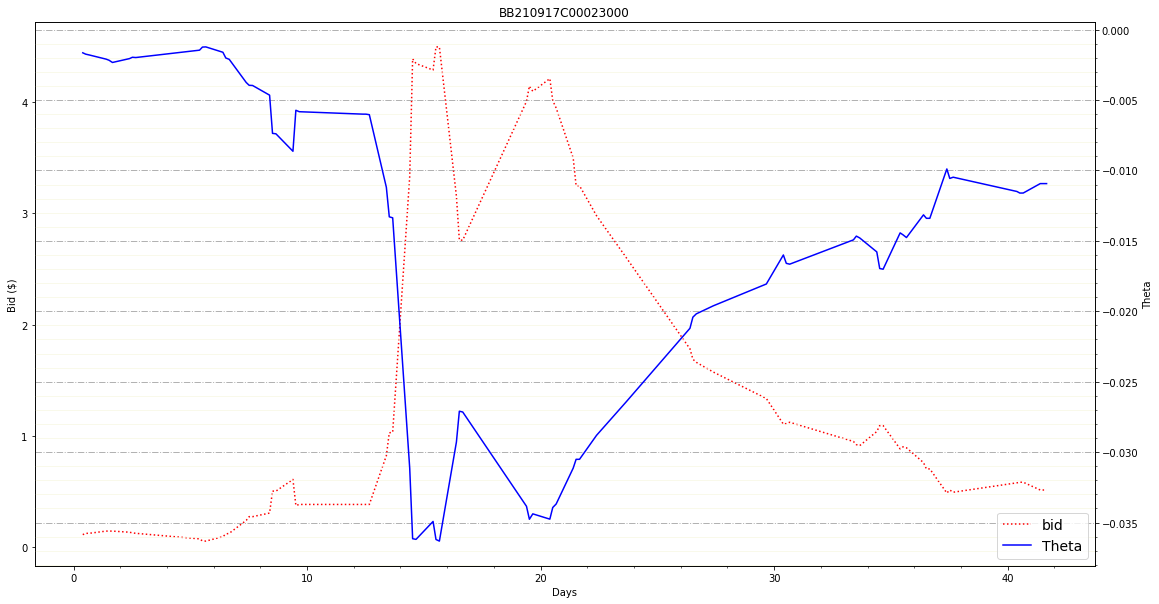

In [7]:
fig,ax = plt.subplots()
ax.set_title(option_name)
ax.set_xlabel("Days")
ax.set_ylabel("Bid ($)")
line1, = ax.plot(xs, bid, 'r:', label='bid')
ax2 = ax.twinx()
ax2.set_ylabel("Theta")
line2, = ax2.plot(xs, theta, 'b-', label='Theta')
plt.legend(handles=[line1, line2], loc='lower right', fontsize=14)
#major grid lines
plt.grid(b=True, which='major', color='gray', alpha=0.6, linestyle='dashdot', lw=1)
#minor grid lines
plt.minorticks_on()
plt.grid(b=True, which='minor', color='beige', alpha=0.6, ls='-', lw=1)
plt.rcParams['figure.figsize'] = [19, 10]
plt.show()